In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
from scipy.spatial.distance import squareform

In [2]:
# importing data 
df = pd.read_csv('non_linear_data.csv')
df.head()

,x,y
0,-9.287140,86.433820
1,-9.231645,75.810173
2,-9.173281,98.570667
3,-9.711065,89.629847
4,-8.839999,80.185659


(100,) (100,)
(100, 1) (100, 1)


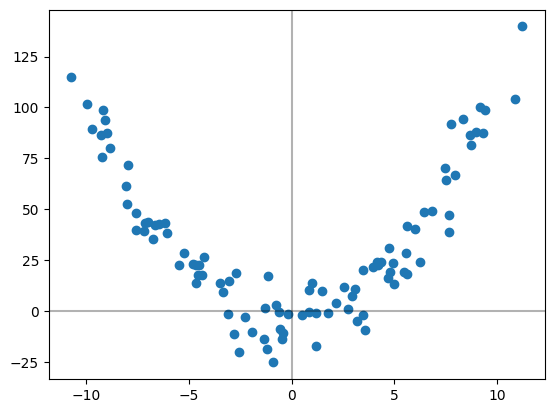

In [3]:
# plotting the data
X = np.array(df['x'])
y = np.array(df['y'])
print(X.shape, y.shape)   # this sometimes gives error
X = X.reshape(len(X), 1)
y = y.reshape(len(y), 1)
print(X.shape, y.shape)
plt.axhline(0, color='black', alpha= 0.3)
plt.axvline(0, color='black', alpha= 0.3)
plt.scatter(X, y)

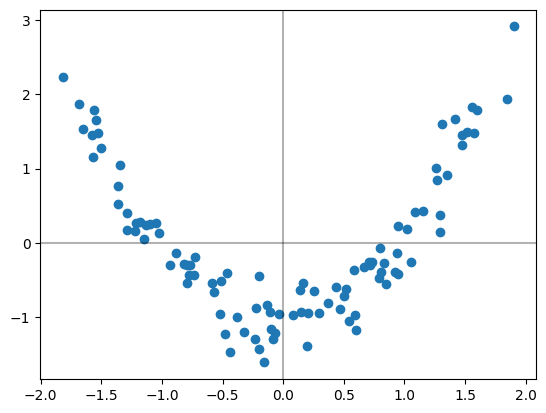

In [4]:
# normalizing the data

X = (X - X.mean()) / X.std()
y = (y - y.mean()) / y.std()
plt.axhline(0, color='black', alpha= 0.3)
plt.axvline(0, color='black', alpha= 0.3)
plt.scatter(X, y)

In [5]:
# creating suppoting function
def validating_vector(u, dtype=None):
    u = np.asanyarray(u, dtype=dtype, order='C')
    if u.ndim != 1:
        raise ValueError('only 1-D array can be used')
    return u


def minkowski(u, v, p=2, w=None):
    u = validating_vector(u)
    v = validating_vector(v)
    if p <= 0:
        raise ValueError("p must be greater than 0")
    u_v = u - v
    if w is not None:
        w = validating_vector(w)
        if p == 1:
            root_w = w
        elif p == 2:
            # better precision and speed
            root_w = np.sqrt(w)
        elif p == np.inf:
            root_w = (w != 0)
        else:
            root_w = np.power(w, 1/p)
        u_v = root_w * u_v
    dist = np.linalg.norm(u_v, ord=p)
    return dist
def euclidean(u, v, w=None):
    return minkowski(u, v, p=2, w=w)

def copy_array_if_base_present(a):
    """Copy the array if its base points to a parent array."""
    if a.base is not None:
        return a.copy()
    return a

def squareform(X, force="no", checks=True):
    X = np.ascontiguousarray(X)

    s = X.shape

    if force.lower() == 'tomatrix':
        if len(s) != 1:
            raise ValueError("Forcing 'tomatrix' but input X is not a "
                             "distance vector.")
    elif force.lower() == 'tovector':
        if len(s) != 2:
            raise ValueError("Forcing 'tovector' but input X is not a "
                             "distance matrix.")


In [29]:
# # writing kernels functions 
def pairwise_l2_distances(X, Y):

    D = -2 * X @ Y.T + np.sum(Y ** 2, axis=1) + np.sum(X ** 2, axis=1)[:, np.newaxis]
    D[D < 0] = 0  # clip any value less than 0 (a result of numerical imprecision)
    return np.sqrt(D)

def gaussian_kernel(x, y, sigma=1.0):
    return np.exp(-pairwise_l2_distances(X , X)**2 / (2 * (sigma**2)))

def liner_kernel(x, y):
    return np.dot(x, y.T)

def polynomial_kernel(x, y, p=3):
    return (1 + np.dot(x, y.T)) ** p

def sigmoid_kernel(x, y, gamma=1.0, r=1.0):
    return np.tanh(gamma * np.dot(x, y.T) + r)

def laplacian_kernel(x, y, sigma=1.0):
    return np.exp(-pairwise_l2_distances(x, y) / sigma)


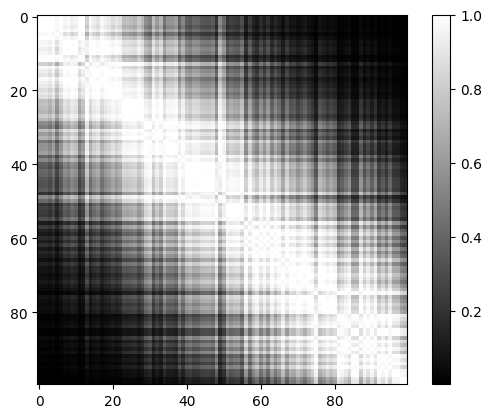

In [47]:
matrix_l=gaussian_kernel(X, X)

# plotting the kernel matrix
plt.imshow(matrix_l, cmap='gray')
plt.colorbar()


In [53]:
# plt.plot(matrix_l)
# print(matrix_l[2])

In [15]:
A = np.array([[1,2,3],[4,5,6]])
A.shape

(2, 3)

In [18]:
def pairwise_l2_distances(X, Y):

    D = -2 * X @ Y.T + np.sum(Y ** 2, axis=1) + np.sum(X ** 2, axis=1)[:, np.newaxis]
    D[D < 0] = 0  # clip any value less than 0 (a result of numerical imprecision)
    return np.sqrt(D)

In [ ]:
def pairwise_l2_distances(X, Y):

    D = -2 * X @ Y.T + np.sum(Y ** 2, axis=1) + np.sum(X ** 2, axis=1)[:, np.newaxis]
    D[D < 0] = 0  # clip any value less than 0 (a result of numerical imprecision)
    return np.sqrt(D)